In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../dataset/car_prices.csv")
dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,hourly,daily,weekly,montly
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.681507,73.630137,454.807692,1791.666667
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.681507,73.630137,454.807692,1791.666667
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),5.136986,102.739726,634.615385,2500.000000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4.751712,95.034247,587.019231,2312.500000
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11.472603,229.452055,1417.307692,5583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),5.650685,113.013699,698.076923,2750.000000
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),5.273973,105.479452,651.538462,2566.666667
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),5.821918,116.438356,719.230769,2833.333333
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),1.900685,38.013699,234.807692,925.000000


Initial exploration

In [63]:
dataset.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,hourly,daily,weekly,montly
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.681507,73.630137,454.807692,1791.666667
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.681507,73.630137,454.807692,1791.666667
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),5.136986,102.739726,634.615385,2500.000000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),4.751712,95.034247,587.019231,2312.500000
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11.472603,229.452055,1417.307692,5583.333333


Distribution of cars across different years.

Range of years: 2 to 33


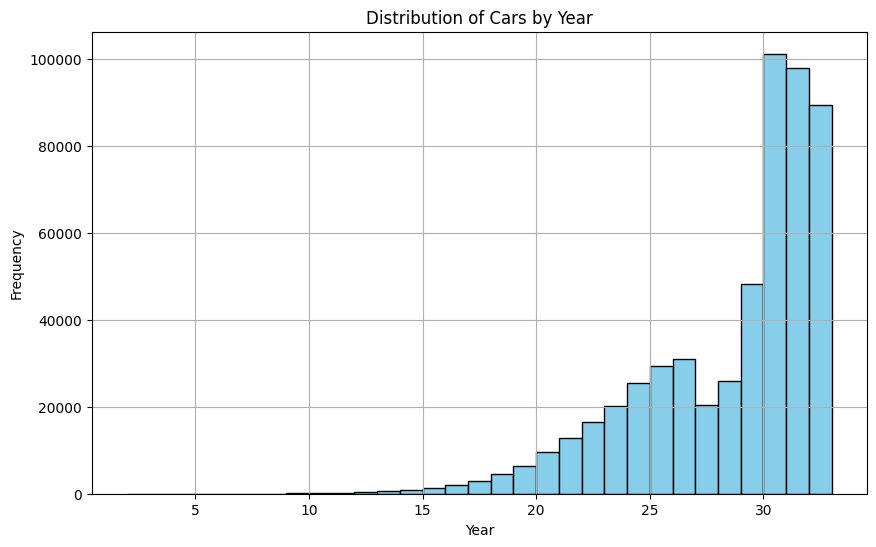

In [57]:
min_year = dataset['year'].min()
max_year = dataset['year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(dataset['year'], bins=range(dataset['year'].min(), dataset['year'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Drop null values

In [61]:
dataset.dropna(axis=0, inplace=True)

In [21]:
dataset[['condition', 'odometer', 'mmr','sellingprice','color']].corr()

ValueError: could not convert string to float: 'white'

In [20]:
dataset.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

Different Relationships with numerical columns

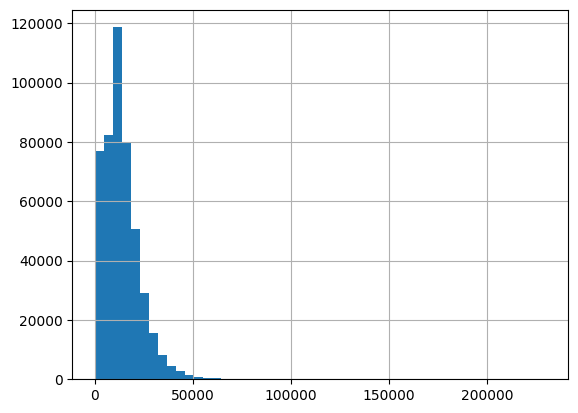

In [9]:
dataset['sellingprice'].hist(bins=50)
plt.show()

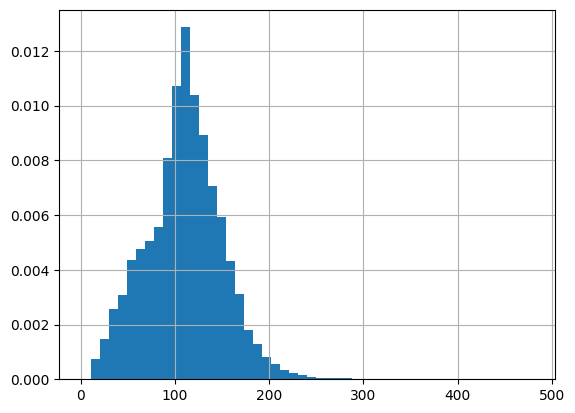

In [11]:
import numpy as np
np.sqrt(dataset['sellingprice']).hist(bins=50, density=True)
plt.show()

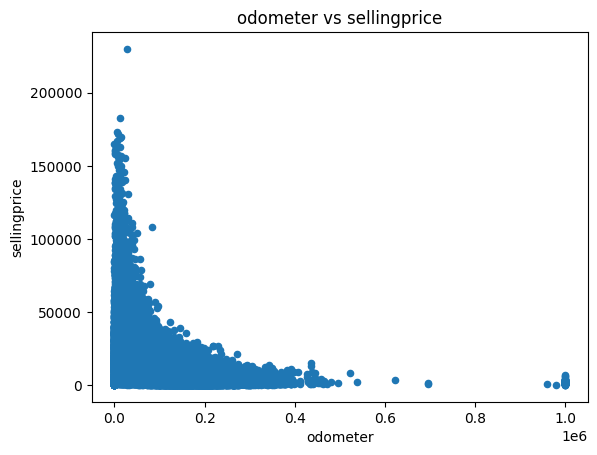

In [ ]:
dataset.plot.scatter(x='odometer',y='sellingprice',title='odometer vs sellingprice')
plt.show()

Correlation between Selling Price and Driven Kilometers: -0.5773969284272995


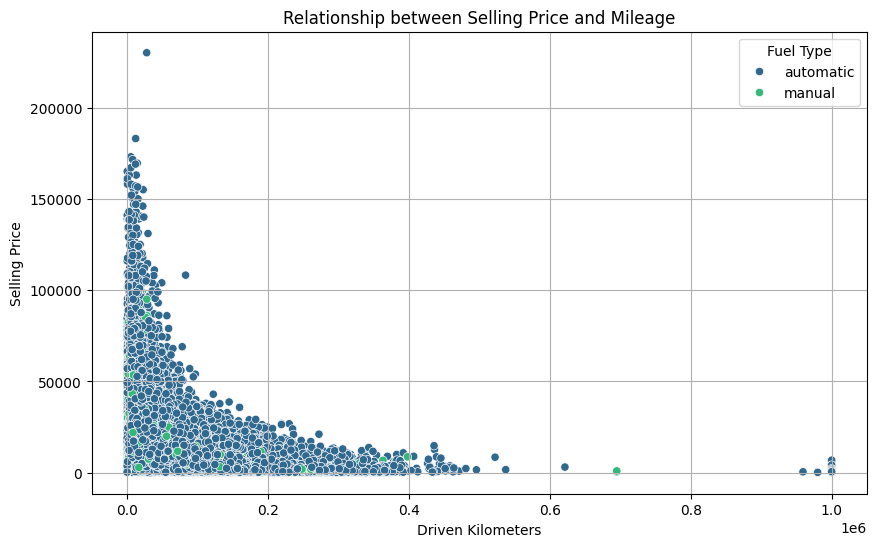

In [ ]:
correlation = dataset['sellingprice'].corr(dataset['odometer'])

print("Correlation between Selling Price and Driven Kilometers:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="odometer", y="sellingprice", data=dataset, hue="transmission", palette="viridis")
plt.title("Relationship between Selling Price and Mileage")
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()

Correlation between Selling Price and condition: 0.31771209280364343


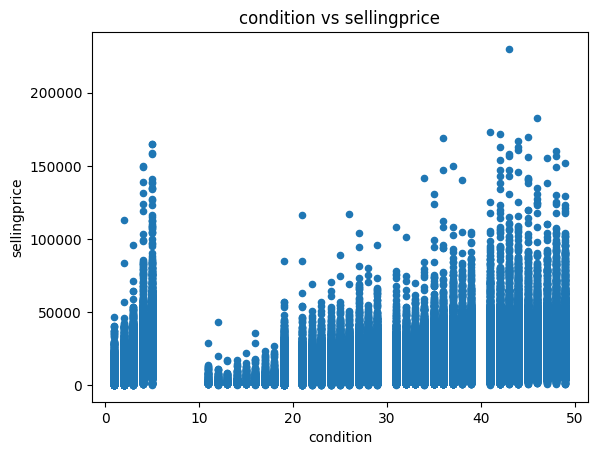

In [ ]:
correlation = dataset['sellingprice'].corr(dataset['condition'])

print("Correlation between Selling Price and condition:", correlation)
dataset.plot.scatter(x='condition',y='sellingprice',title='condition vs sellingprice')
plt.show()

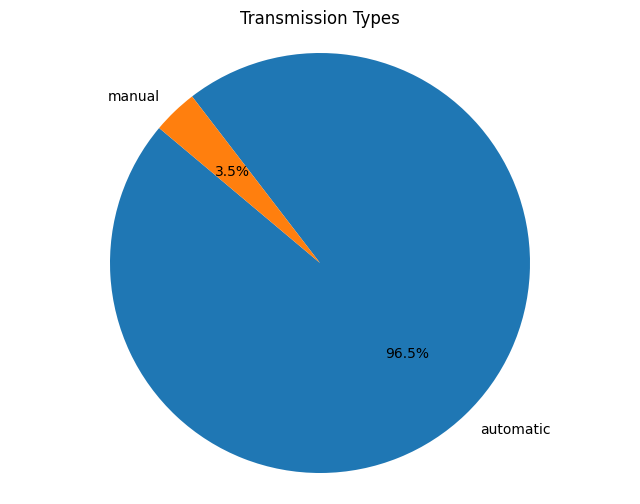

In [ ]:
transmission_counts = dataset['transmission'].value_counts()

# Plotting the transmission types as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Types')
plt.axis('equal')
plt.show()

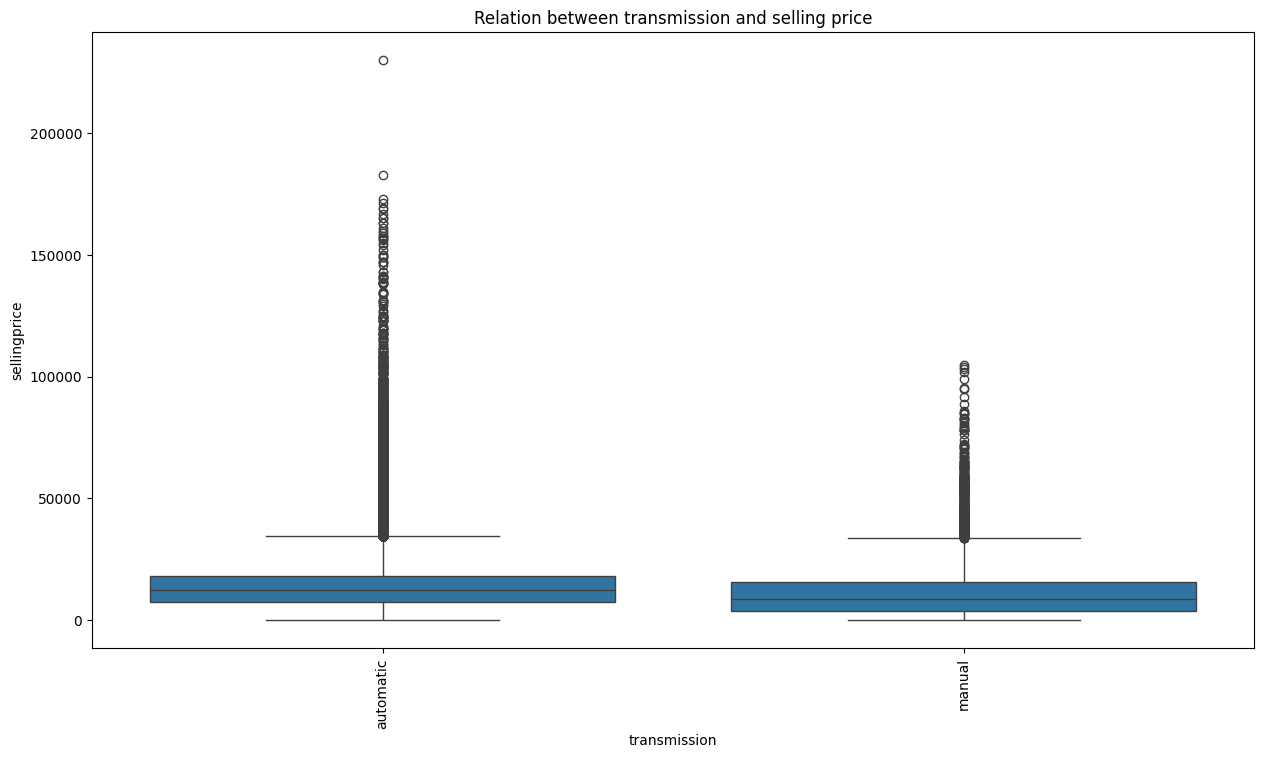

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="transmission", y="sellingprice", data=dataset)
plt.xticks(rotation=90)
plt.title("Relation between transmission and selling price")
plt.show()

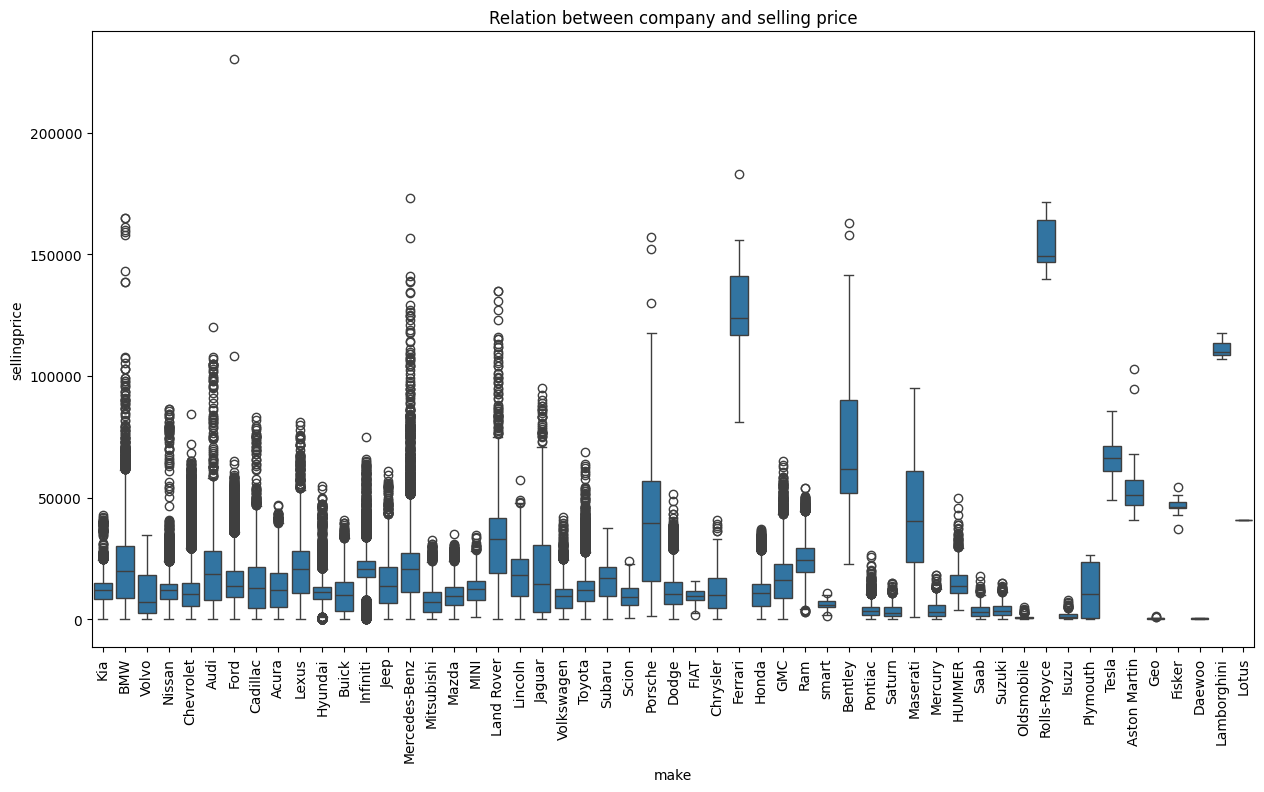

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="make", y="sellingprice", data=dataset)
plt.xticks(rotation=90)
plt.title("Relation between company and selling price")
plt.show()

Correlation between Selling Price and MMR: 0.9834931745325886


/var/folders/tg/t8hkw4211s9gy_bng5sbj8bh0000gn/T/ipykernel_61014/2204324799.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="mmr", y="sellingprice", data=dataset, palette="viridis")


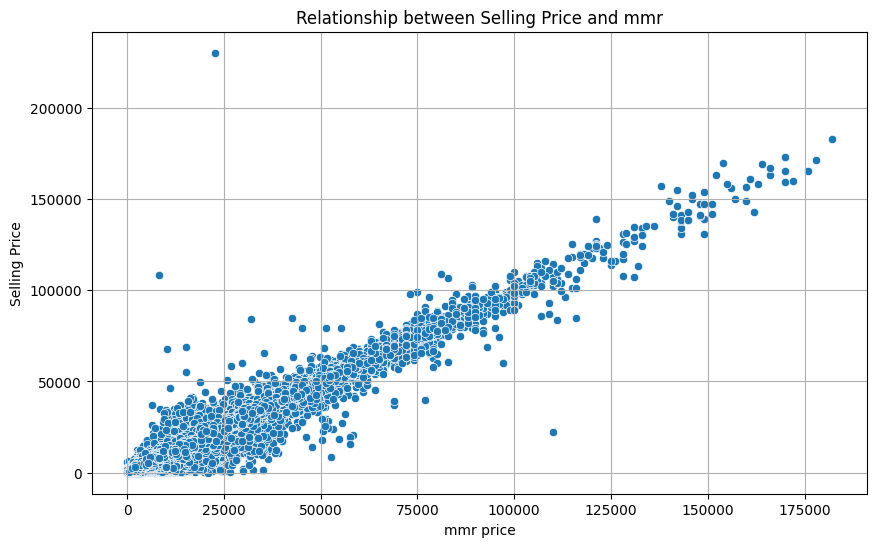

In [ ]:
correlation = dataset['sellingprice'].corr(dataset['mmr'])

print("Correlation between Selling Price and MMR:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="mmr", y="sellingprice", data=dataset, palette="viridis")
plt.title("Relationship between Selling Price and mmr")
plt.xlabel("mmr price")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

Correlation between Selling Price and year: 0.5789328422224858


/var/folders/tg/t8hkw4211s9gy_bng5sbj8bh0000gn/T/ipykernel_61014/3658680425.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="year", y="sellingprice", data=dataset, palette="viridis")


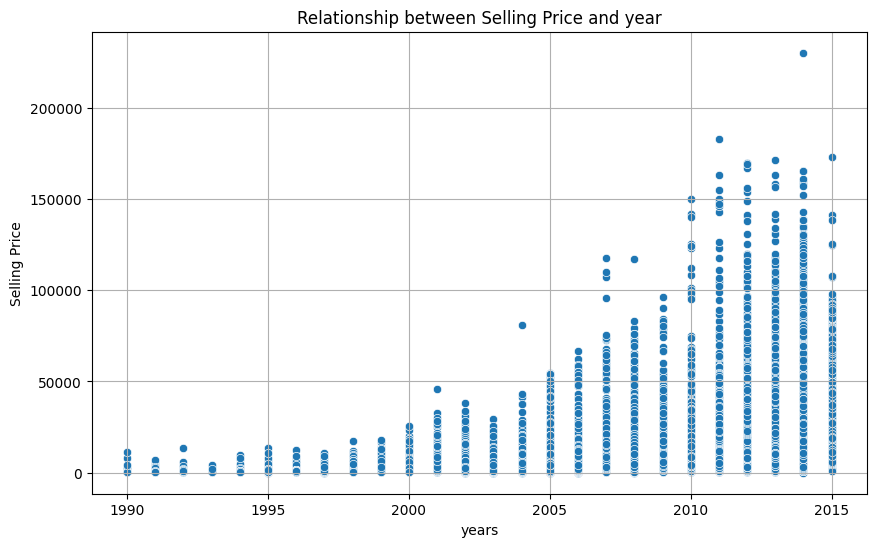

In [ ]:
correlation = dataset['sellingprice'].corr(dataset['year'])

print("Correlation between Selling Price and year:", correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="year", y="sellingprice", data=dataset, palette="viridis")
plt.title("Relationship between Selling Price and year")
plt.xlabel("years")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

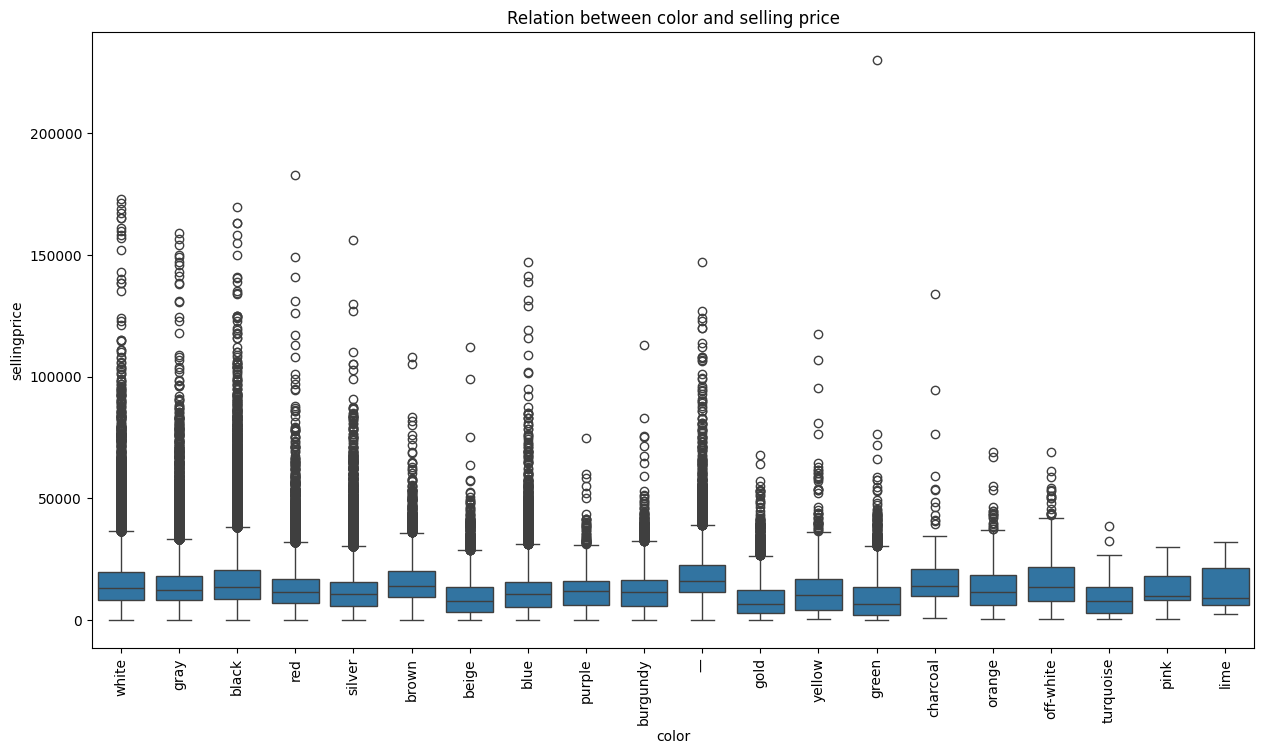

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="color", y="sellingprice", data=dataset)
plt.xticks(rotation=90)
plt.title("Relation between color and selling price")
plt.show()

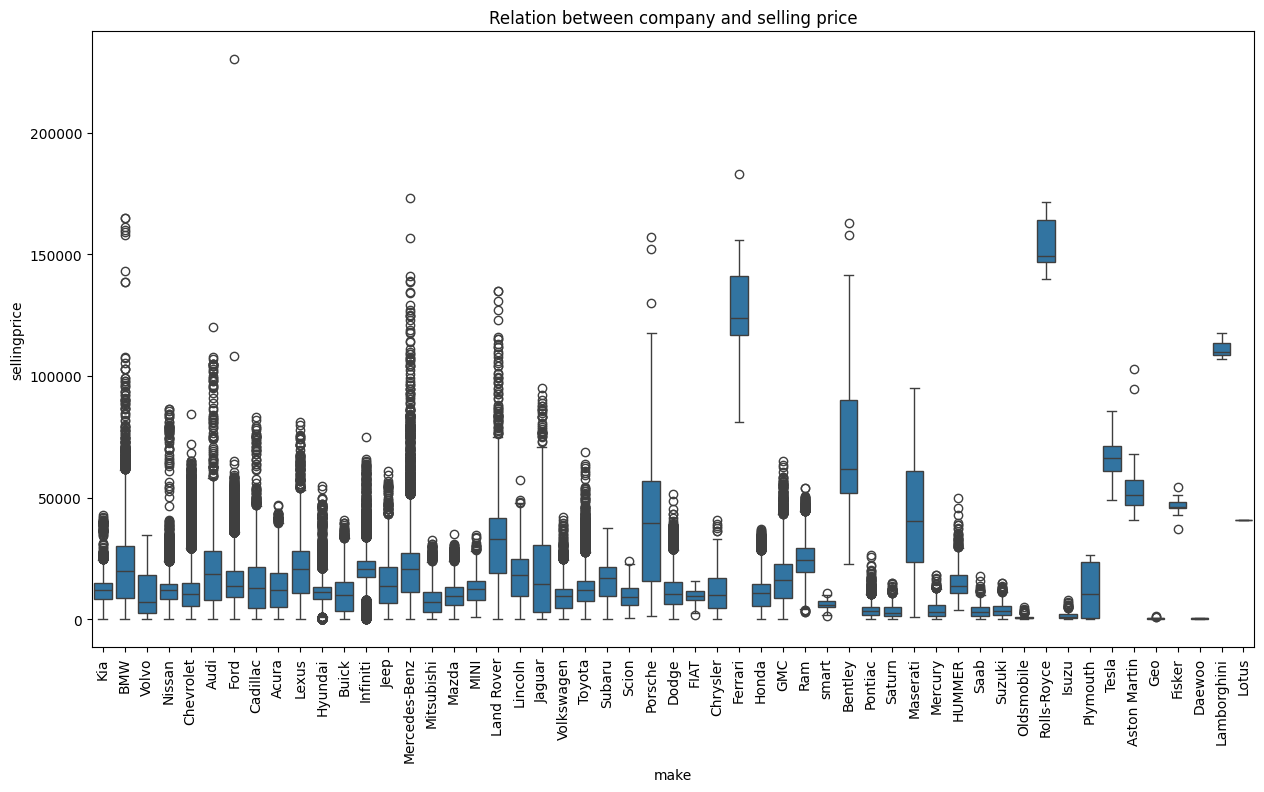

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="make", y="sellingprice", data=dataset)
plt.xticks(rotation=90)
plt.title("Relation between company and selling price")
plt.show()

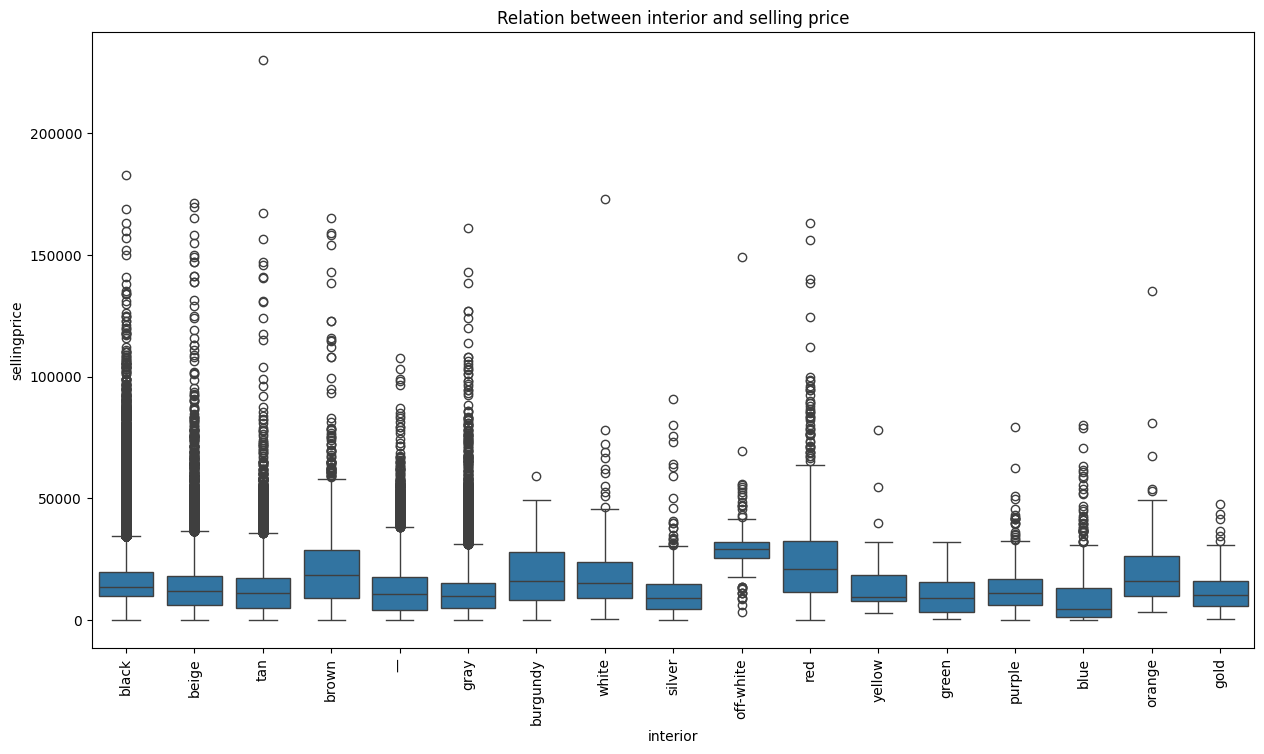

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x="interior", y="sellingprice", data=dataset)
plt.xticks(rotation=90)
plt.title("Relation between interior and selling price")
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder
Year_le = LabelEncoder()
dataset['year'] = Year_le.fit_transform(dataset['year'])
Make_le = LabelEncoder()
dataset['make'] = Make_le.fit_transform(dataset['make'])
Trim_le = LabelEncoder()
dataset['trim'] = Trim_le.fit_transform(dataset['trim'])
# Model_le = LabelEncoder()
# dataset['model'] = Model_le.fit_transform(dataset['model'])
Body_le = LabelEncoder()
dataset['body'] = Body_le.fit_transform(dataset['body'])
Condition_le = LabelEncoder()
dataset['condition'] = Condition_le.fit_transform(dataset['condition'])
Transmission_le = LabelEncoder()
dataset['transmission'] = Transmission_le.fit_transform(dataset['transmission'])

##Split the data into X AND Y
input_data = dataset[["year","make","trim","body","condition", "odometer", "transmission" ]]
output_data = dataset[["sellingprice", "hourly", "daily","weekly","montly"]]

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data  = pd.DataFrame(ss.fit_transform(input_data),columns = input_data.columns)

input_data.head(2)

,year,make,trim,body,condition,odometer,transmission
0,1.252966,0.161251,0.119456,-0.240929,-1.794624,-0.963866,-0.189432
1,1.252966,0.161251,0.119456,-0.240929,-1.794624,-1.103374,-0.189432


In [66]:
input_data.dtypes

year            float64
make            float64
trim            float64
body            float64
condition       float64
odometer        float64
transmission    float64
dtype: object

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data, output_data , test_size = 0.2, random_state = 42)
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (377860, 7) (377860, 5)
Testing set shape: (94465, 7) (94465, 5)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(x_train,y_train)*100)
print("R squared for test is :", lr.score(x_test,y_test)*100)

/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 1653.5425669947701
Test RMSE: 1632.9712697125012

R squared for train is : 40.003704473224424
R squared for test is : 40.26394505471284


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(x_train,y_train)*100)
print("R squared for test is :", rf.score(x_test,y_test)*100)

/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 237.2287525761833
Test RMSE: 643.9920102067633

R squared for train is : 98.76510984782647
R squared for test is : 90.7094717440709


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)

/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 7.732221822619463
Test RMSE: 844.891808320977

R squared for train is : 99.99870309842676
R squared for test is : 84.38494124852205


In [75]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(x_train,y_train)*100)
print("R squared for test is :", dt.score(x_test,y_test)*100)

/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/mrugankjadhav/CarRental/CarRentalPricingPrediction/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 6.90958302479971
Test RMSE: 893.6077710772412

R squared for train is : 99.99895239549771
R squared for test is : 82.11152477685101


In [74]:
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(x_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(x_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(x_test,y_test)*100),
}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

Models sorted by RMSE and R squared (Test Set):
Random Forest: RMSE = 643.9920102067633, R squared = 90.7094717440709
Decision Tree: RMSE = 844.891808320977, R squared = 10.927660298998465
Linear Regression: RMSE = 1632.9712697125012, R squared = 40.26394505471284

Best Model: Random Forest
RMSE: 643.9920102067633
R squared: 90.7094717440709


In [72]:
new_data = {
    "year": 2015,
    "make": "Kia",
    "trim": "LX",
    "body": "SUV",
    "condition": 5,
    "odometer": 16639.0,
    "transmission": "automatic",
}
new_data["year"] = Year_le.transform([new_data["year"]])[0]
new_data["make"] = Make_le.transform([new_data["make"]])[0]
new_data["trim"] = Trim_le.transform([new_data["trim"]])[0]
new_data["body"] = Body_le.transform([new_data["body"]])[0]
new_data["condition"] = Condition_le.transform([new_data["condition"]])[0]
new_data["transmission"] = Transmission_le.transform([new_data["transmission"]])[0]

new_data_df = pd.DataFrame([new_data])

new_data_standardized = pd.DataFrame(ss.transform(new_data_df), columns=new_data_df.columns)

# Make predictions on the standardized new data using the trained Random Forest model
predicted_price = rf.predict(new_data_standardized)

# Print the predicted price
print("Predicted Selling Price:", predicted_price)

Predicted Selling Price: [[1.77952665e+04 3.04713467e+00 6.09426934e+01 3.76438329e+02
  1.48293887e+03]]


In [29]:
dataset.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,hourly,daily,weekly,montly
0,30,24,Sorento,997,35,0,5xyktca69fg566472,ca,4,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),3.681507,73.630137,454.807692,1791.666667
